# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
learn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ExtraaLearn.csv") ##  Complete the code to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail() ##  Complete the code to view last 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(4612, 15)

The data has 4612 rows and 15 columns.

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

The dataset has 5 numerical columns and 10 categorical columns.
There are no missing values.

In [ ]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

There are no duplicate values.

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [ ]:
data.describe() ##  Complete the code to print the statistical summary of the data

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


- The average age of customers is 46 and the median age is 51. All customers are between the ages 18 and 63.
- On average, potential customers visit the website about 3-4 times.
- The average time spent on the website is roughly 12 minutes.
- The average website visitor views 3 pages per visit.

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

In [ ]:
# checking the number of unique values
data["ID"].nunique() # Complete the code to check the number of unique values

4612

In [ ]:
data.drop(["ID"], axis = 1, inplace = True)# Complete the code to drop "ID" column from data

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

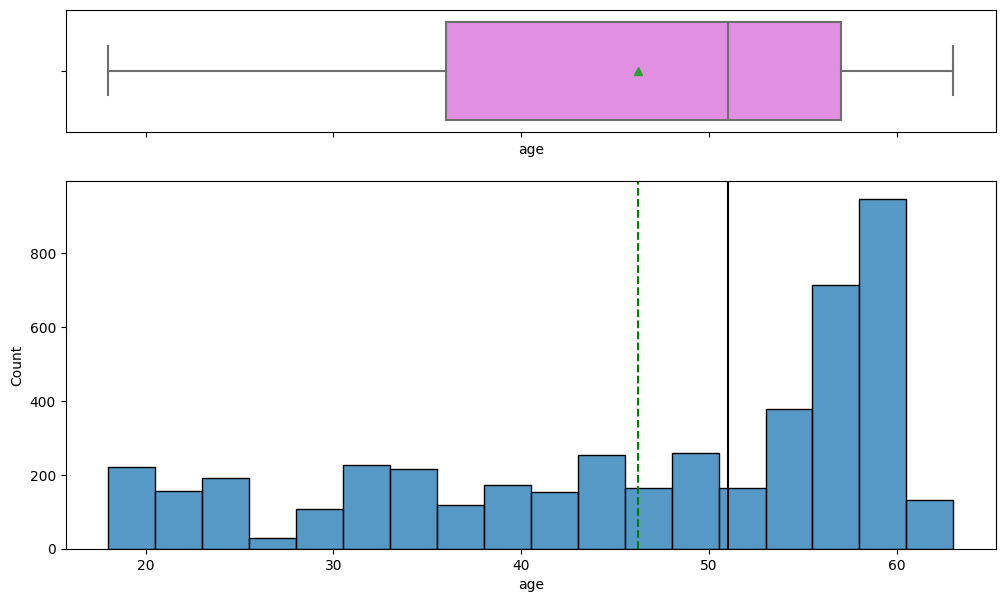

In [ ]:
histogram_boxplot(data, "age")

The age is skewed to the left. Most potential customers are in their mid to late 50s and early 60s. This makes sense as this age range likely have children who are in college and are purchasing this for them, and/or are themselves seeking to reskill or upskill (since it has been a while they got their education/skills and things have likely changed the most for this category of people in most sectors)

### Observations on website_visits

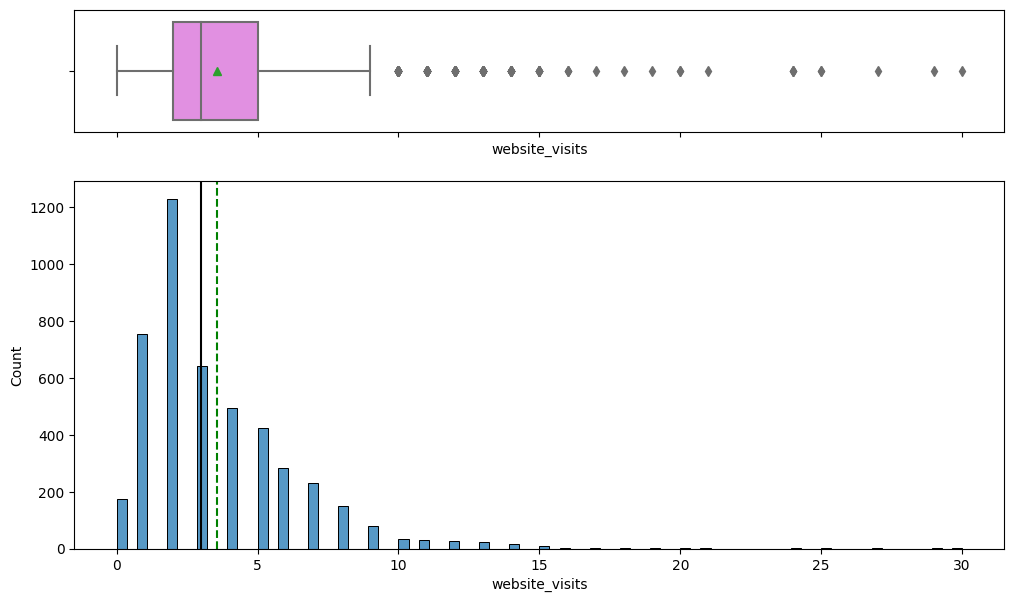

In [ ]:
histogram_boxplot(data, "website_visits") # Complete the code to plot a histogram_boxplot for website_visits

The website visits is skewed right. Most people have visited the website 15 times or less. There are a few outliers who have visited the company's website more than 15 times.

In [ ]:
# To check how many outliers are there
data[data['website_visits']>15].value_counts().sum()

17

There are 17 leads who we can consider as outliers.

In [ ]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

Of all the potential customers, 174 of them have never visited the website. So majority of leads have visited the website.

### Observations on number of time_spent_on_website

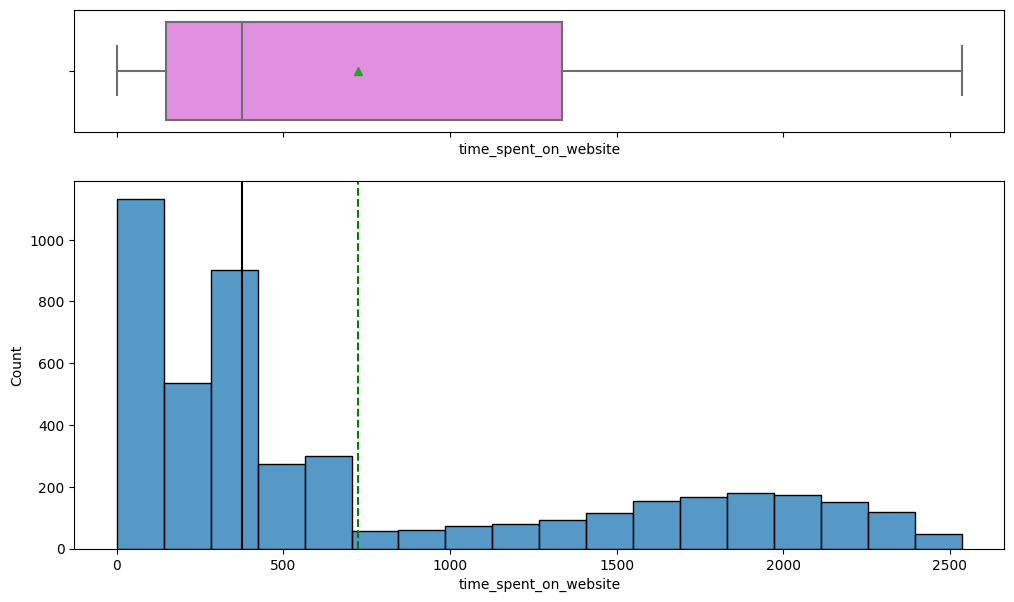

In [ ]:
histogram_boxplot(data, "time_spent_on_website") # Complete the code to plot a histogram_boxplot for time_spent_on_website

The time spent on website is highly skewed to the right. Most people spend less than 500 secs (i.e. 8.33 mins) on the website.

### Observations on number of page_views_per_visit

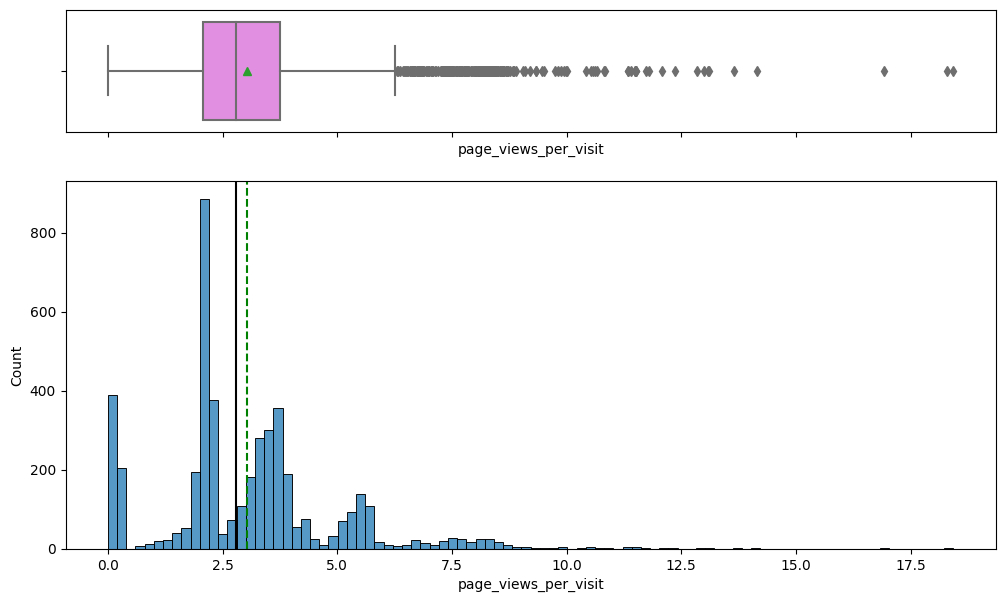

In [ ]:
histogram_boxplot(data,'page_views_per_visit') # Complete the code to plot a histogram_boxplot for page_views_per_visit

- The number of pages viewed per visit is highly skewed to the right.
- There are a lot of outliers too.
- Most people view roughly 1 to 8 pages per visit.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

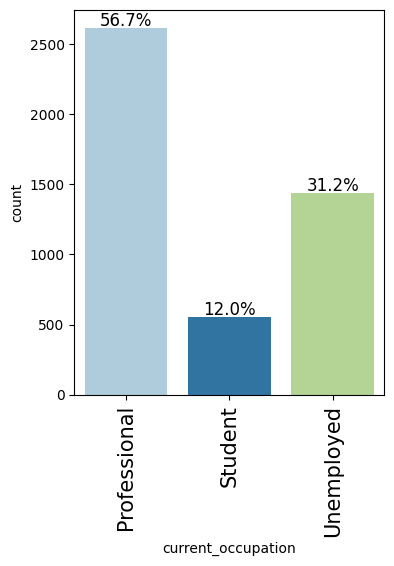

In [ ]:
labeled_barplot(data, "current_occupation", perc=True)

A lot of potential leads are working professionals.

### Observations on number of first_interaction

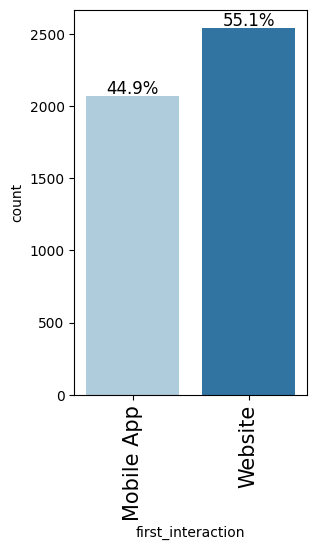

In [ ]:
labeled_barplot(data, "first_interaction", perc=True) # Complete the code to plot labeled_barplot for first_interaction

A majority of leads make their first interaction via the company's website.

### Observations on profile_completed

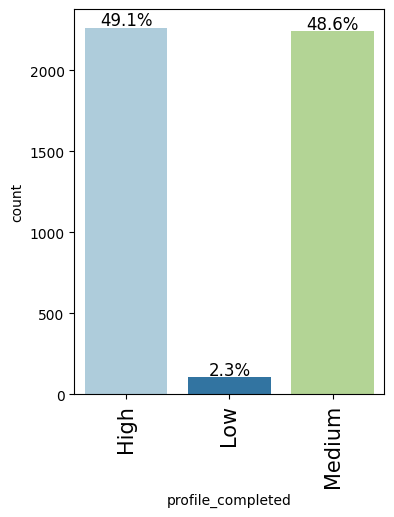

In [ ]:
labeled_barplot(data, "profile_completed", perc=True) # Complete the code to plot labeled_barplot for profile_completed

Slightly less than 50% of leads had high profile completion. And a similar percentage had medium profile completion. So about 98% of leads had medium or high profile completion.

### Observations on last_activity

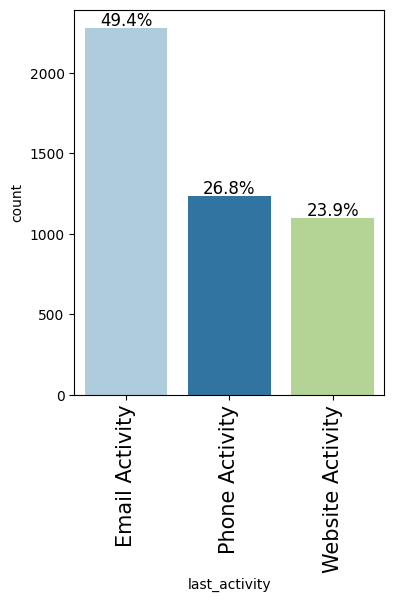

In [ ]:
labeled_barplot(data,"last_activity", perc=True) # Complete the code to plot labeled_barplot for last_activity

Seems like majority of leads ultimately used email interaction later on as against the initial slant towards website activity.

### Observations on print_media_type1

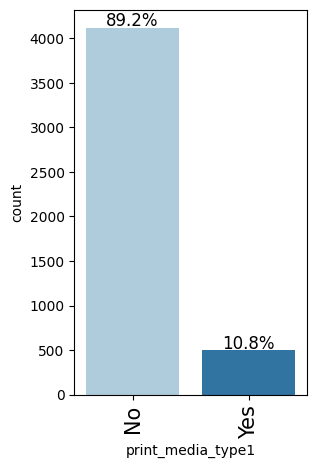

In [ ]:
labeled_barplot(data, "print_media_type1", perc=True) # Complete the code to plot labeled_barplot for print_media_type1

### Observations on print_media_type2

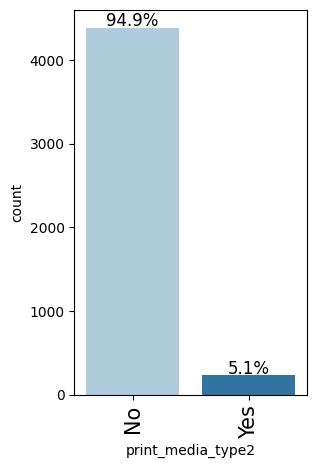

In [ ]:
labeled_barplot(data, "print_media_type2", perc=True) # Complete the code to plot labeled_barplot for print_media_type2

### Observations on digital_media

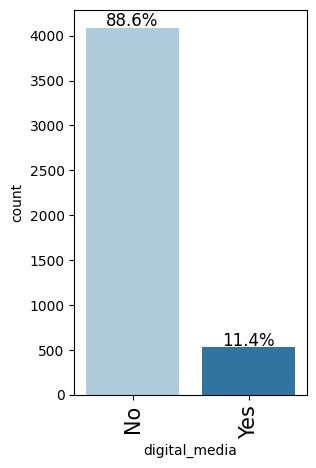

In [ ]:
labeled_barplot(data, "digital_media", perc=True) # Complete the code to plot labeled_barplot for digital_media

### Observations on educational_channels

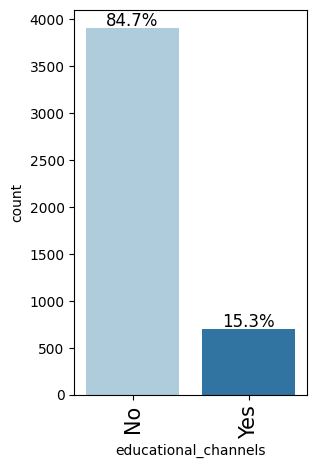

In [ ]:
labeled_barplot(data, "educational_channels", perc=True) # Complete the code to plot labeled_barplot for educational_channels

Majority of people didn't get to know about the company through marketing channels. Of all the channels, the educational channels seems to have been the more popular means as compared to the rest.

### Observations on referral

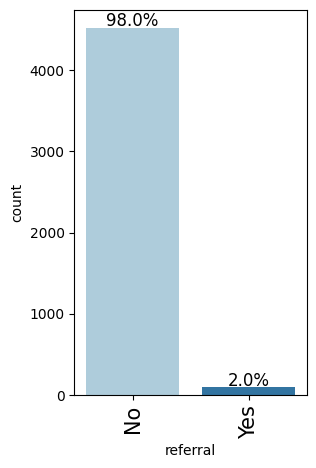

In [ ]:
labeled_barplot(data, "referral", perc=True) # Complete the code to plot labeled_barplot for referral

Only a very small percentage of people got to know about the company via referrals.

### Observations on status

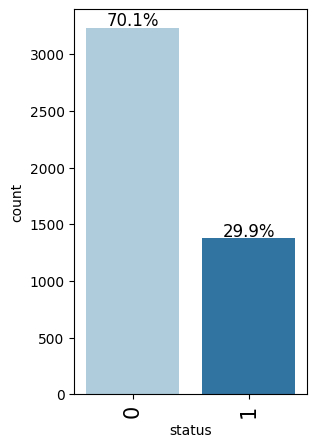

In [ ]:
labeled_barplot(data,"status",perc=True) # Complete the code to plot labeled_barplot for status

**Observations from Univariate Analysis:_________**
- About 30% of potential leads ended up being converted while 70% of them were not.

### Bivariate Analysis

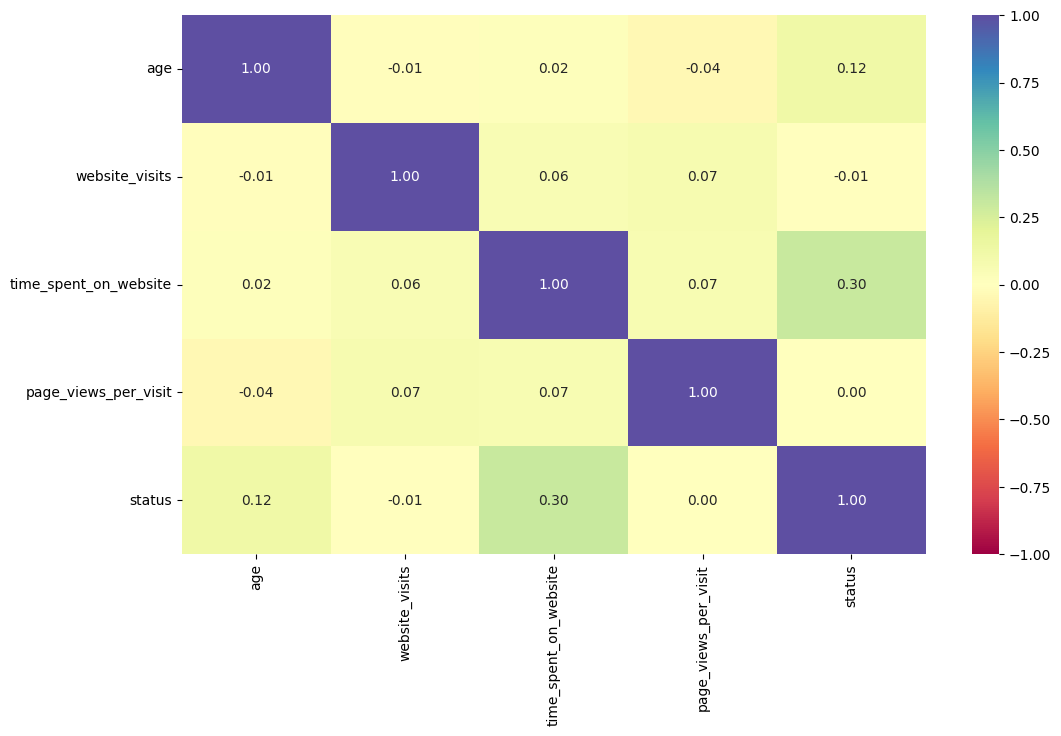

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is no significant correlation between most features. There is some slight correlation between the time spent on the website and status (i.e. if the lead is converted to a paid customer or not).

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


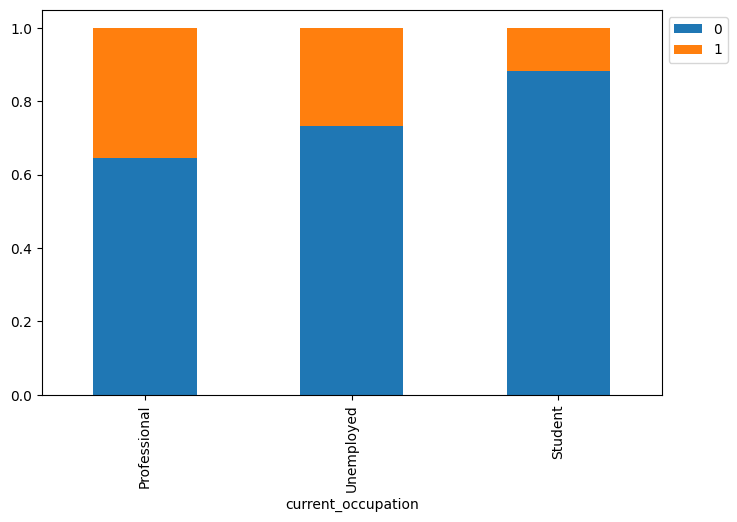

In [ ]:
stacked_barplot(data, "current_occupation", "status")

A higher proportion of working professionals seem to be converted to paid customers than unemployed people and students. This makes sense since professionals are generally able to afford to pay for the program since they are working, while unemployed people and students genrally are not.

**Age can be a good factor to differentiate between such leads**

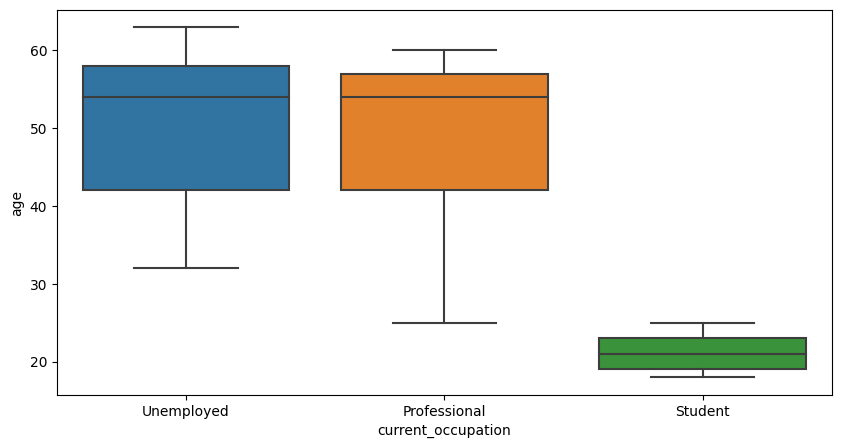

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

Unemployed leads (between 32 to 63 with mean 50) and Professional (between 25 to 60 with mean 50) leads have similar age distribution while students are significantly younger (approximately 18 to 25 with mean 21), as expected.

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


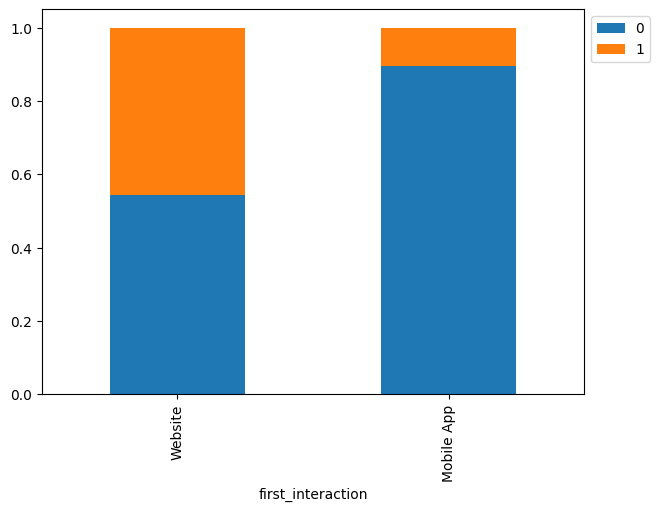

In [ ]:
stacked_barplot(data, "first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

The proportion of leads converted is higher for those whose first interaction was via the website than those whose first interaction was via mobile app.

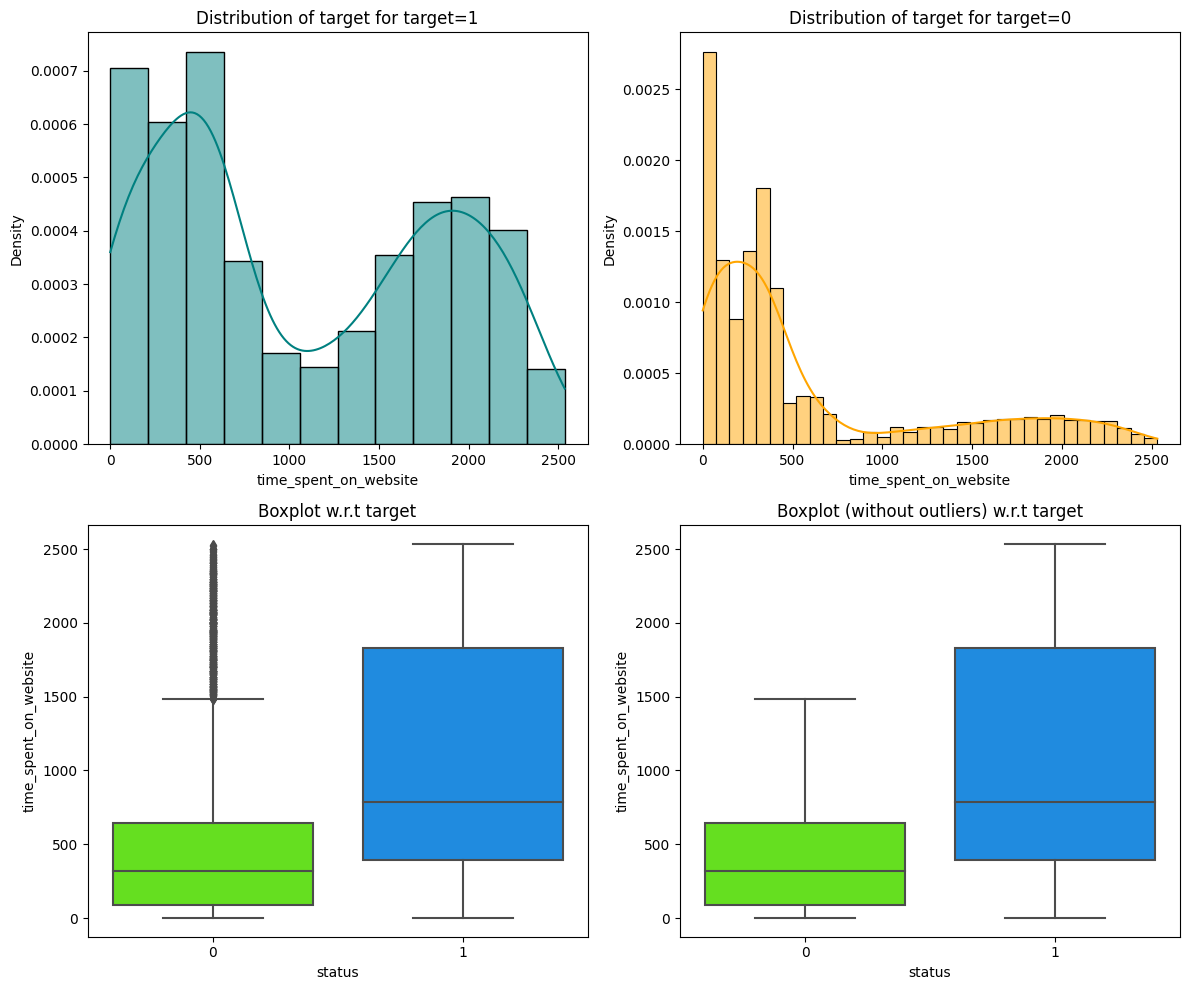

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

Those leads that become paid customers were generally those whose median website time was 2.5 times that of those who remained unconverted.

**Let's do a similar analysis for time spent on website and page views per visit.**

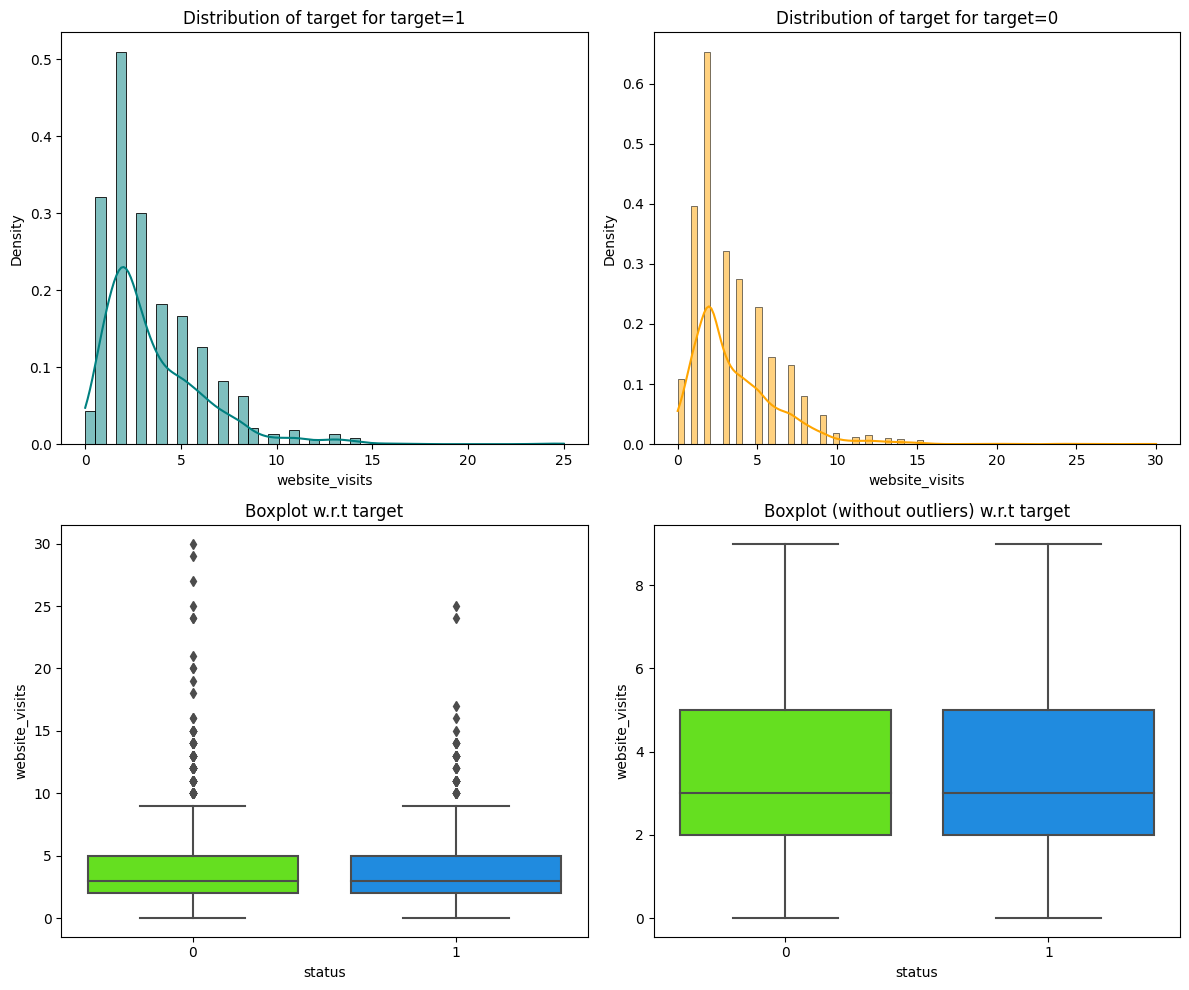

In [ ]:
distribution_plot_wrt_target(data, "website_visits", "status") # Complete the code to plot distribution for website_visits and status

If we remove outliers, there is no significant difference between converted and unconverted leads in terms of number of website visits.

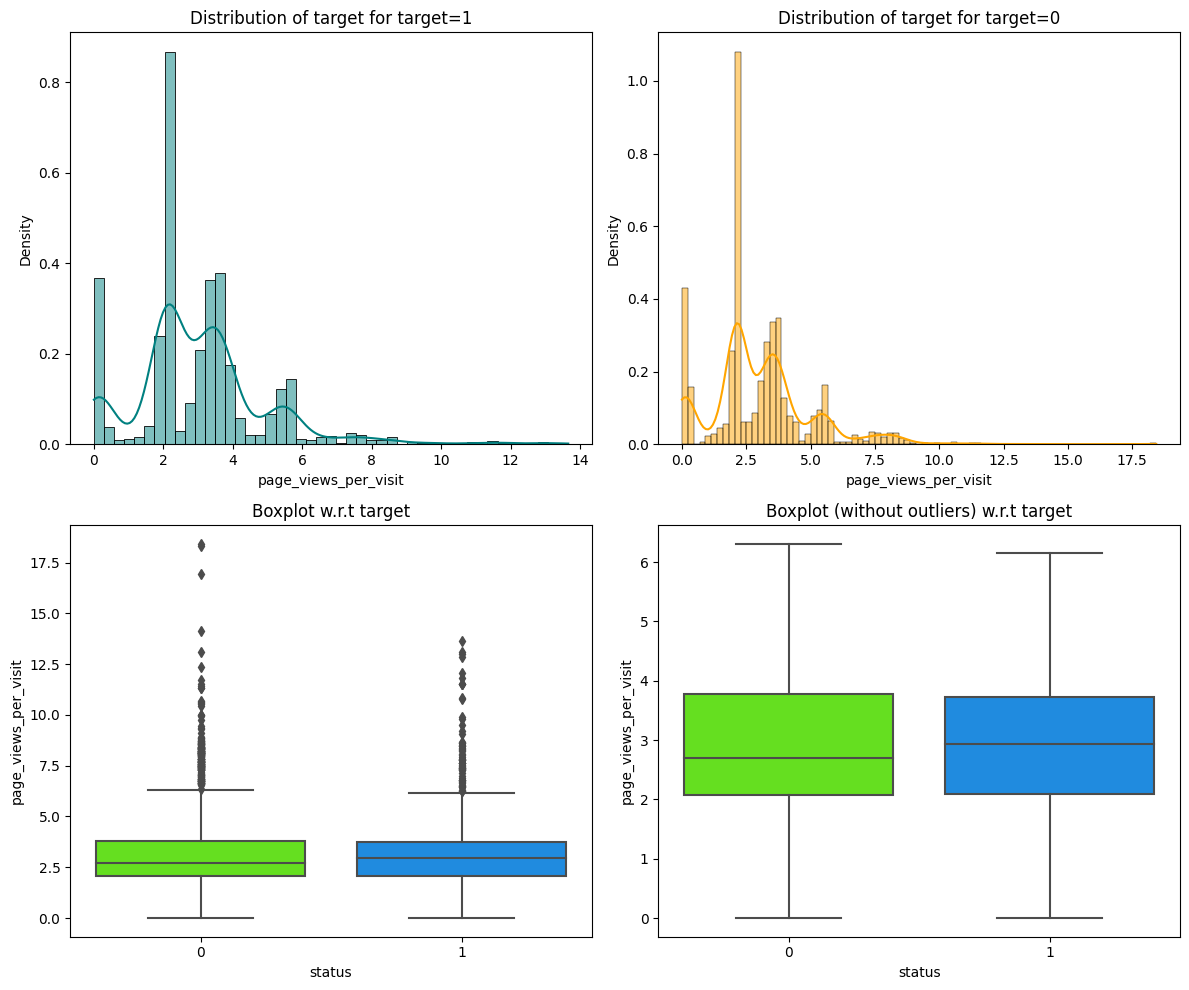

In [ ]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") # Complete the code to plot distribution for page_views_per_visit and status

If we remove outliers, there is no significant difference between converted and unconverted leads in terms of number of page views per visit.

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


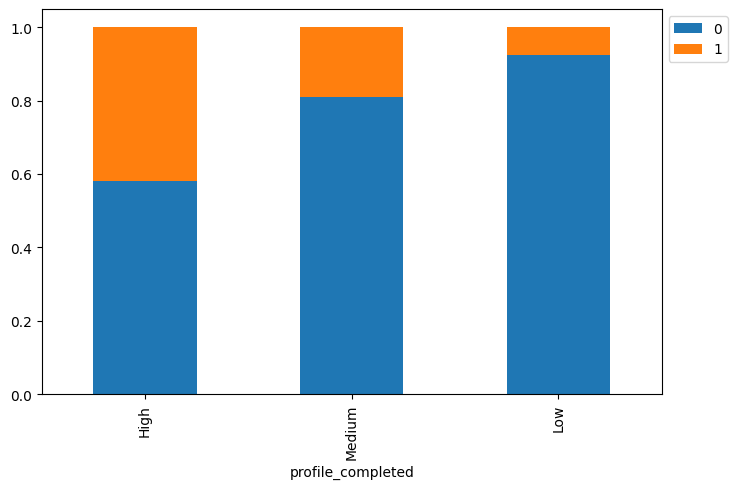

In [ ]:
stacked_barplot(data, "profile_completed", "status")  # Complete the code to plot stacked_barplot for profile_completed and status

As we would expect, those leads who had high profile completion were more likely to be converted (roughly about 40%). On the other hand, those with medium profile completion had 20% conversion rate and those with low profile completion had less than 10% conversion rate.

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


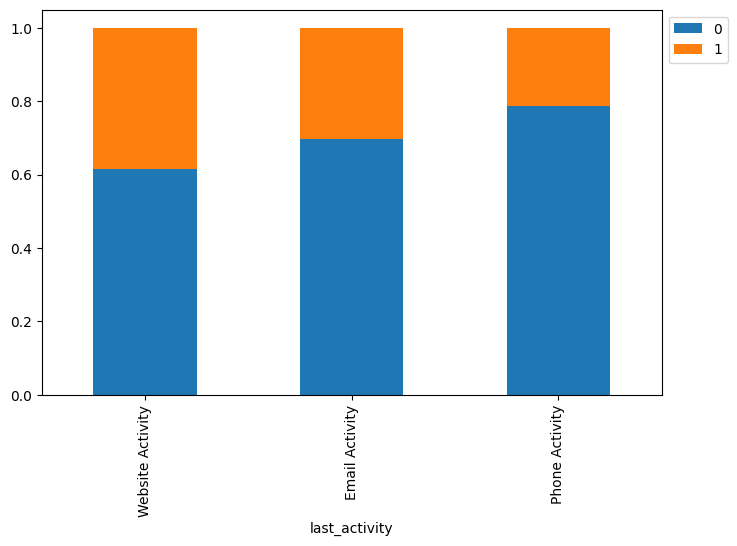

In [ ]:
stacked_barplot(data, "last_activity", "status") # Complete the code to plot stacked_barplot for last_activity and status

If the last activity was on the website, a lead was more likely to be converted than if their last activity was via email or phone communication.

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


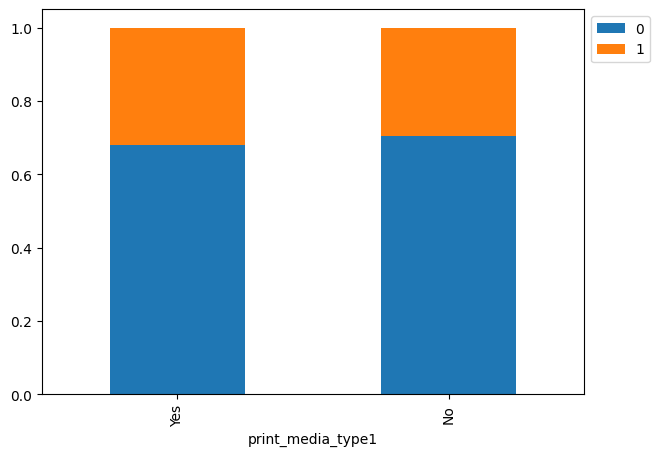

In [ ]:
stacked_barplot(data, "print_media_type1", "status") # Complete the code to plot stacked_barplot for print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


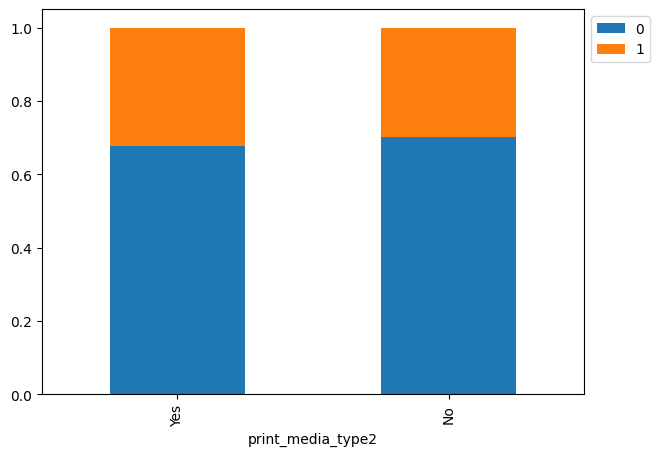

In [ ]:
stacked_barplot(data, "print_media_type2", "status") # Complete the code to plot stacked_barplot for print_media_type2 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


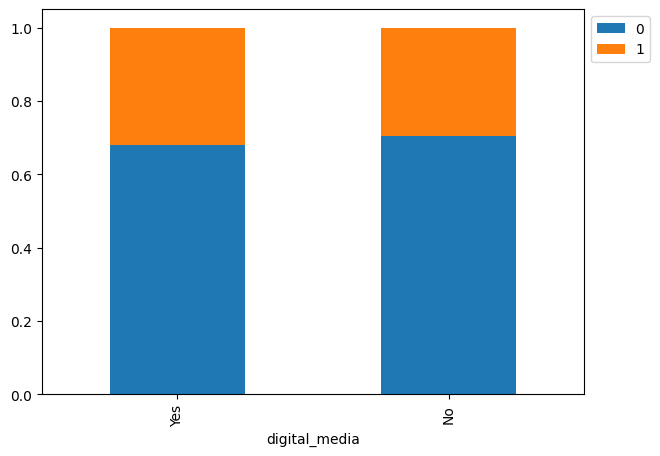

In [ ]:
stacked_barplot(data, "digital_media", "status") # Complete the code to plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


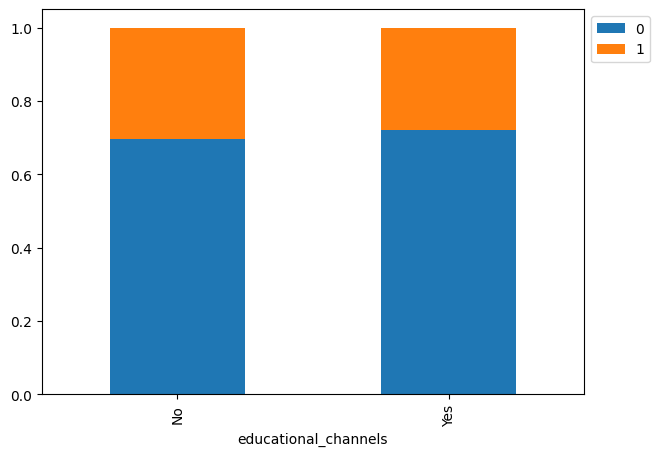

In [ ]:
stacked_barplot(data, "educational_channels", "status") # Complete the code to plot stacked_barplot for educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


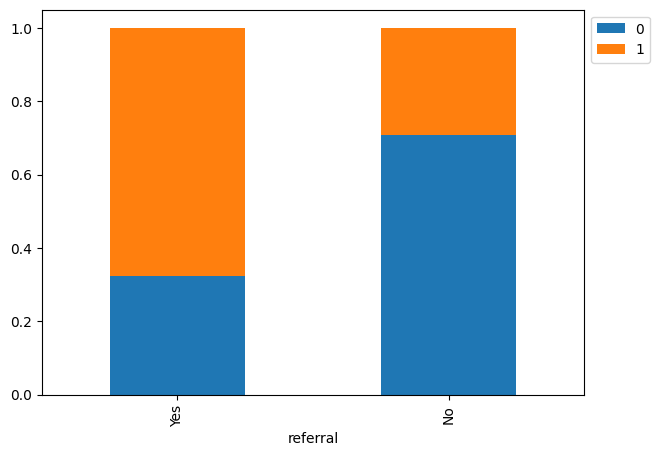

In [ ]:
stacked_barplot(data, "referral", "status") # Complete the code to plot stacked_barplot for referral and status

- In terms of advertisements (via various media channels), the proportion of leads converted was NOT significantly different from the unconverted ones.
- However, in terms of referrals, the proportion of those who were referred by someone they knew were more than twice likely to be converted to paid customers than those who were unreferred.

### Outlier Check

- Let's check for outliers in the data.

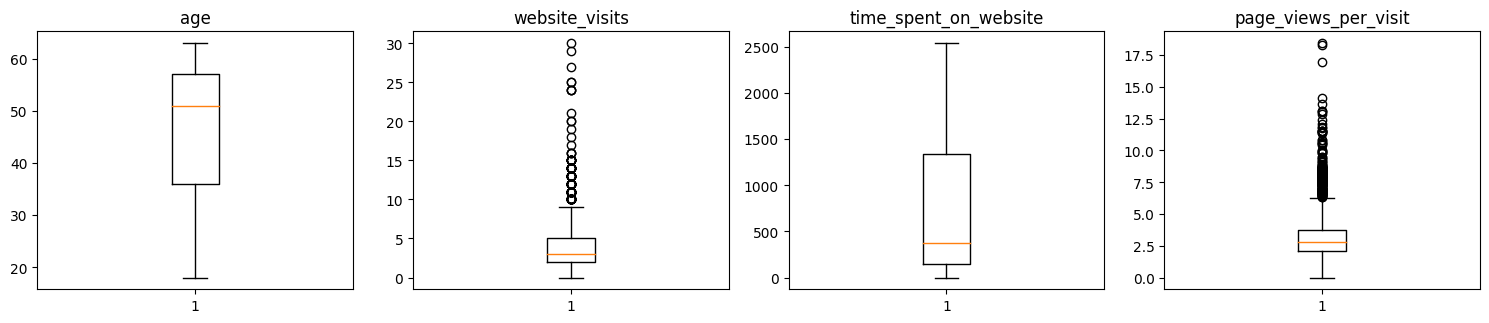

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:_________**

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(columns=["status", "ID"]) #,axis=1
Y = data["status"] # Complete the code to define the dependent (target) variable


#X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
#converting data types of columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [ ]:
#List of columns to create a dummy variables
col_dummy=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', "educational_channels", "referral"]

In [ ]:
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70136
1   0.29864
Name: status, dtype: float64
Percentage of classes in test set:
0   0.70159
1   0.29841
Name: status, dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


## **Building Classification Models**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

### Which case is more important?

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## Decision Tree

### Building Decision Tree Model

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



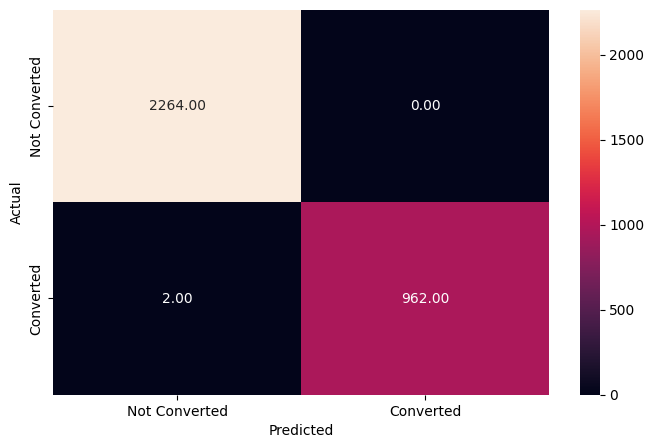

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:_________**
* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* A decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



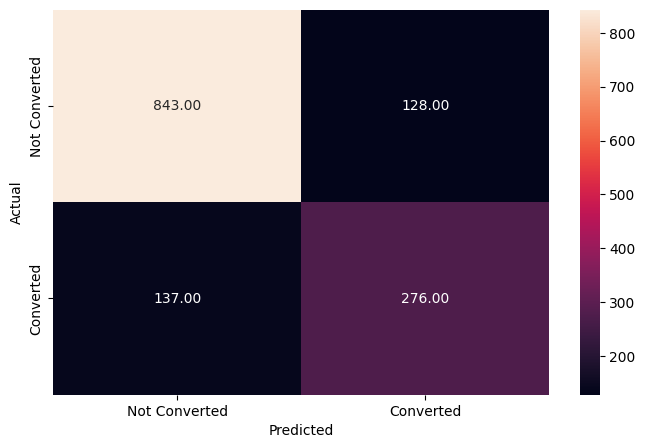

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:_________**
* The model is overfitting.
* We will have to tune the decision tree to reduce the overfitting.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



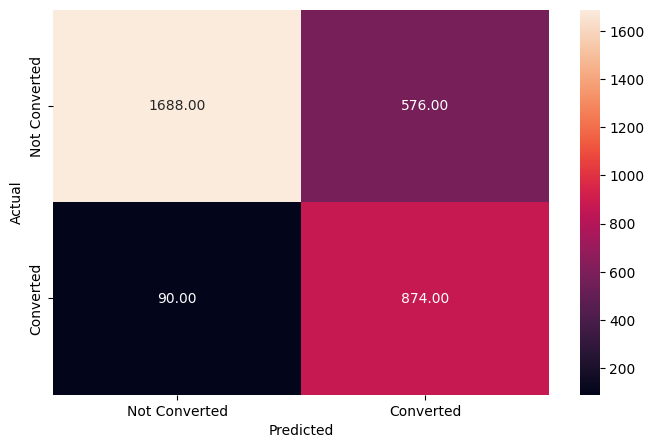

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:__________**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



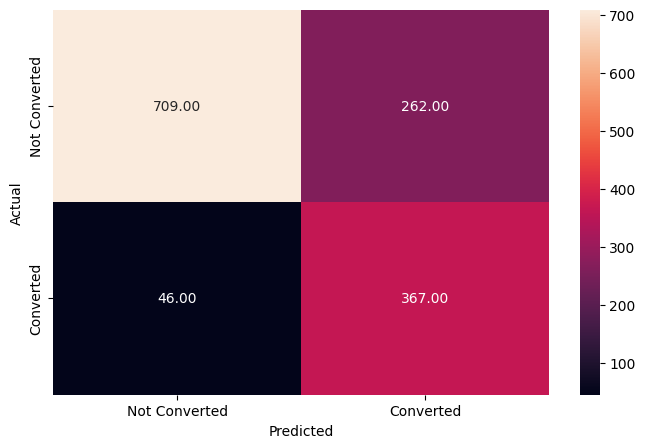

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:__________**
* The model is no longer overfitting. Model performance on test data has significantly improved.

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

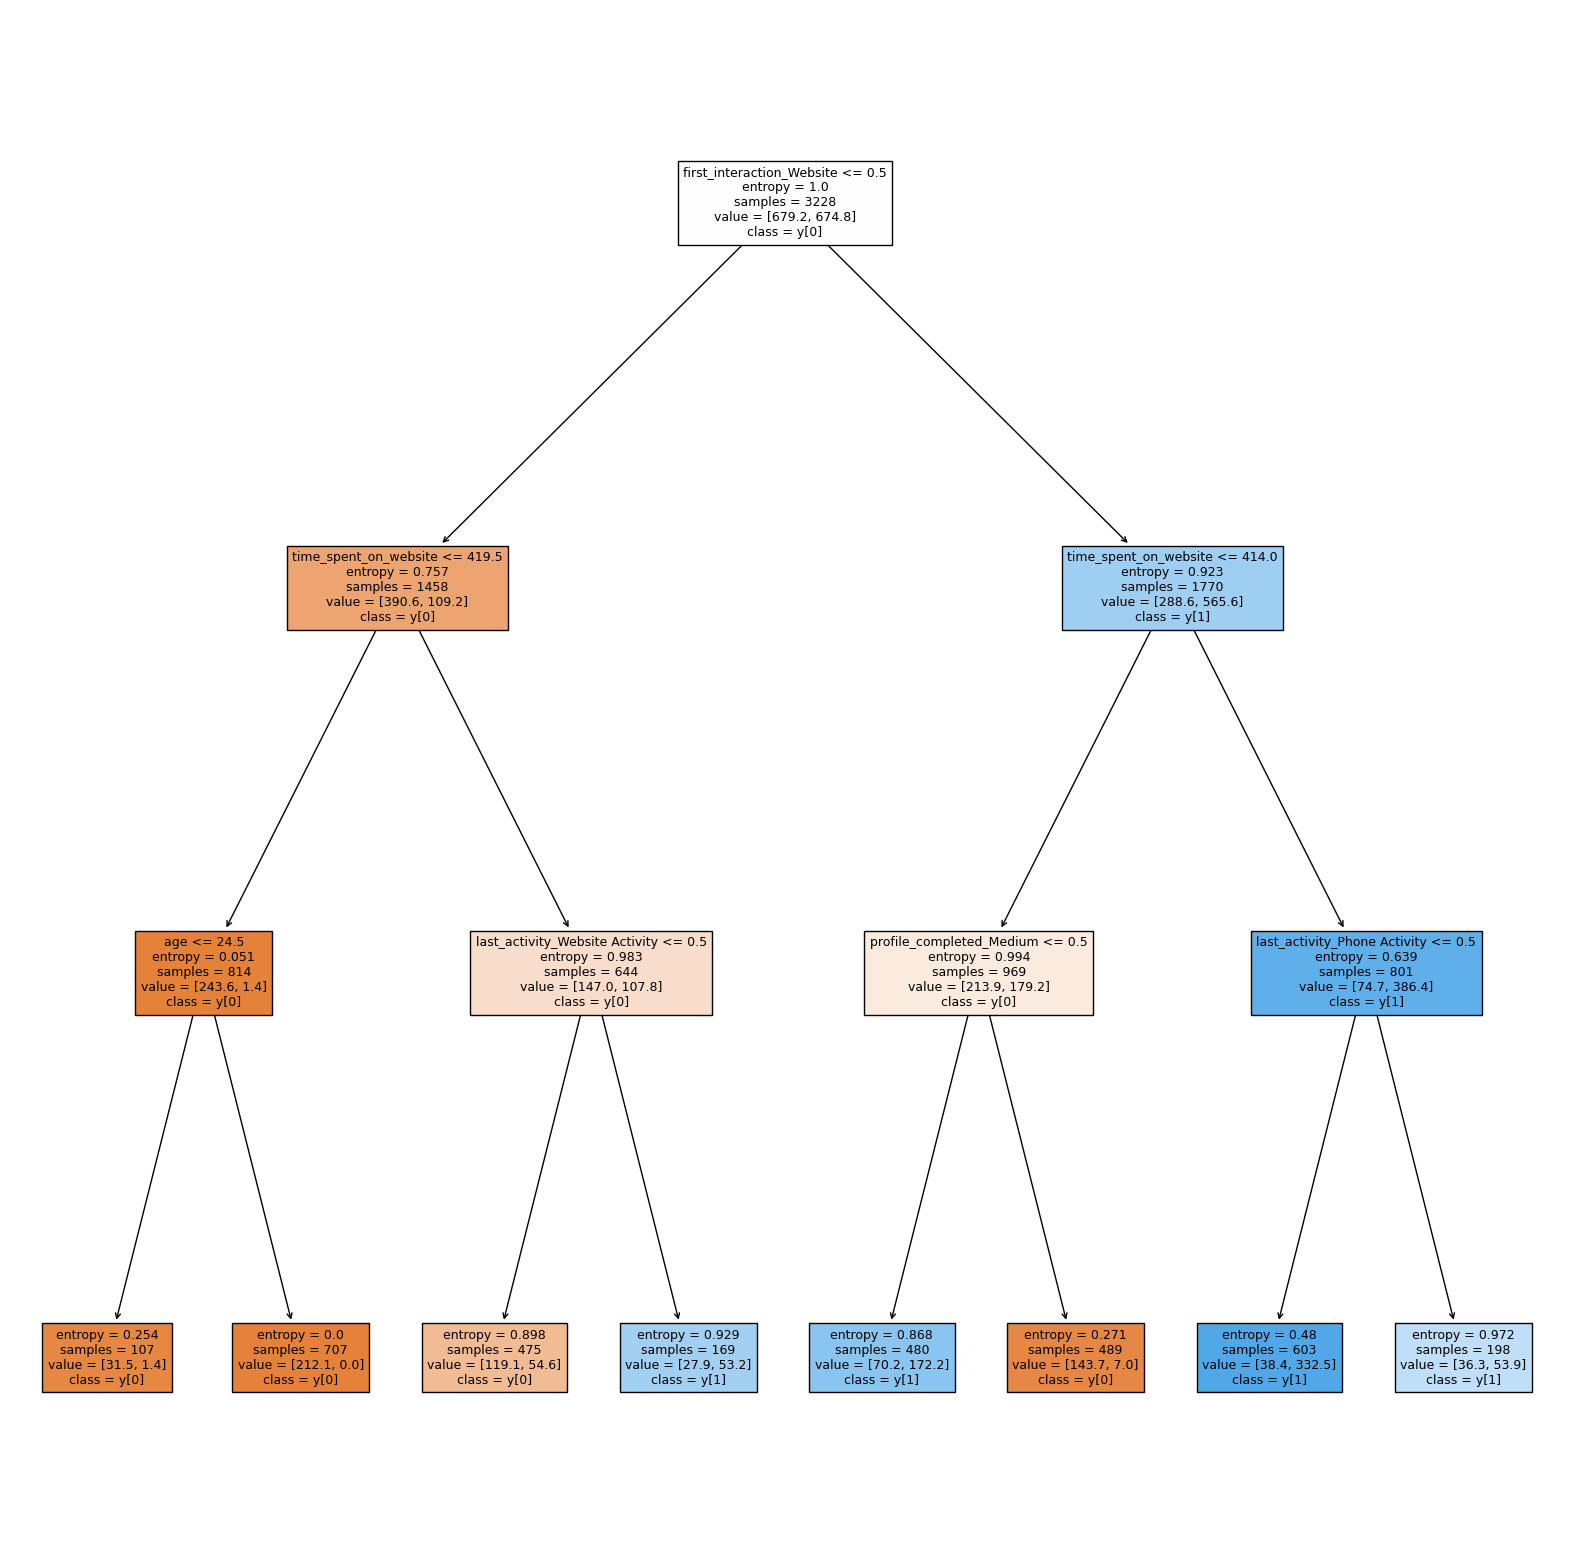

In [ ]:
features = list(X_train.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = False, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

**Let's look at the feature importance** of the tuned decision tree model

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.36555
first_interaction_Website      0.31348
profile_completed_Medium       0.23370
last_activity_Phone Activity   0.04840
last_activity_Website Activity 0.03201
age                            0.00685
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


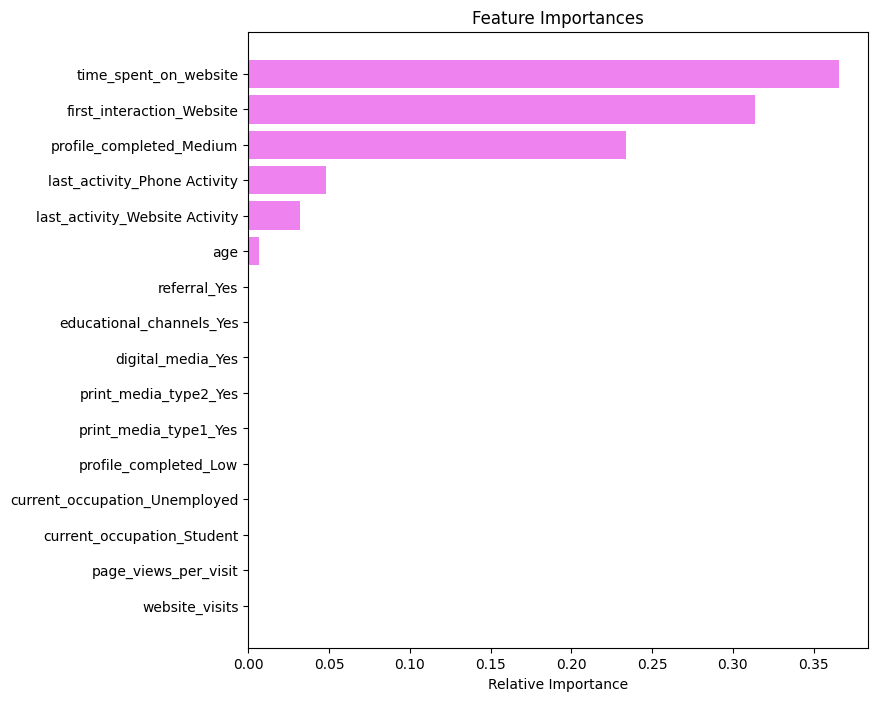

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### Building Random Forest Model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



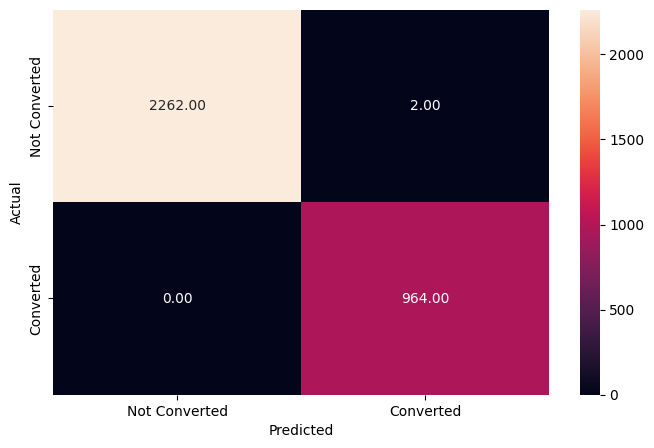

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)


**Observations:________**
- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



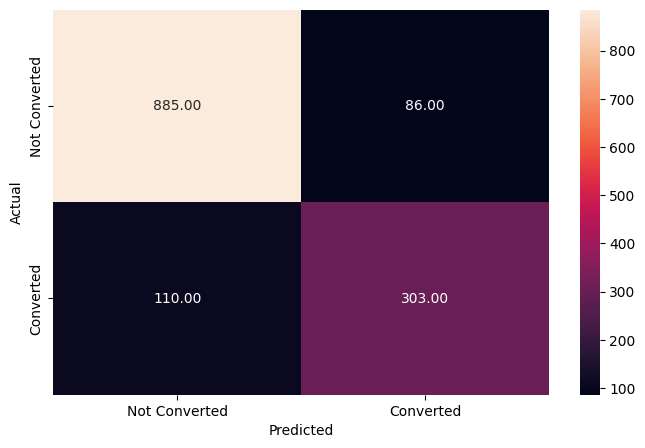

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:____**
- The model is overfitting.

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator, parameters, cv=5, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)


# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=0.8,
                       max_samples=0.9, min_samples_leaf=25, n_estimators=110,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.67      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



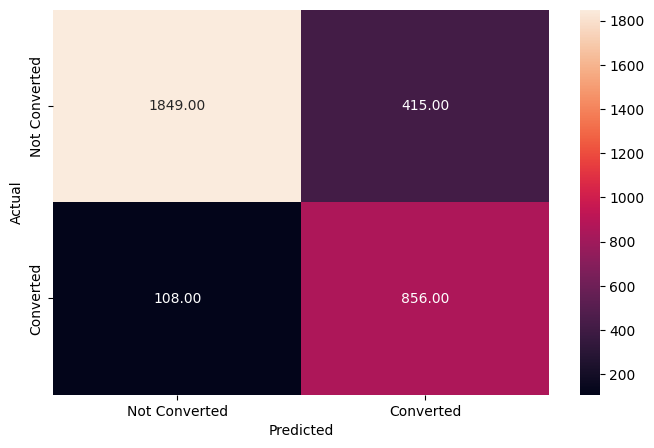

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train,y_pred_train4)

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       971
           1       0.65      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.82      1384



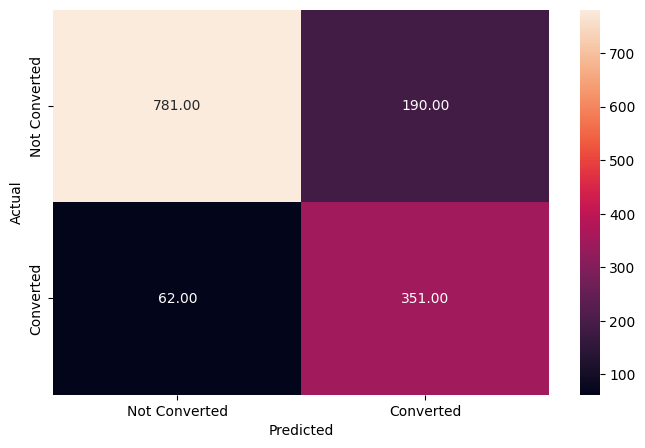

In [ ]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test,y_pred_test4)

**Observations:___________**
- The random forest is better tuned and is no longer overfitting.

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

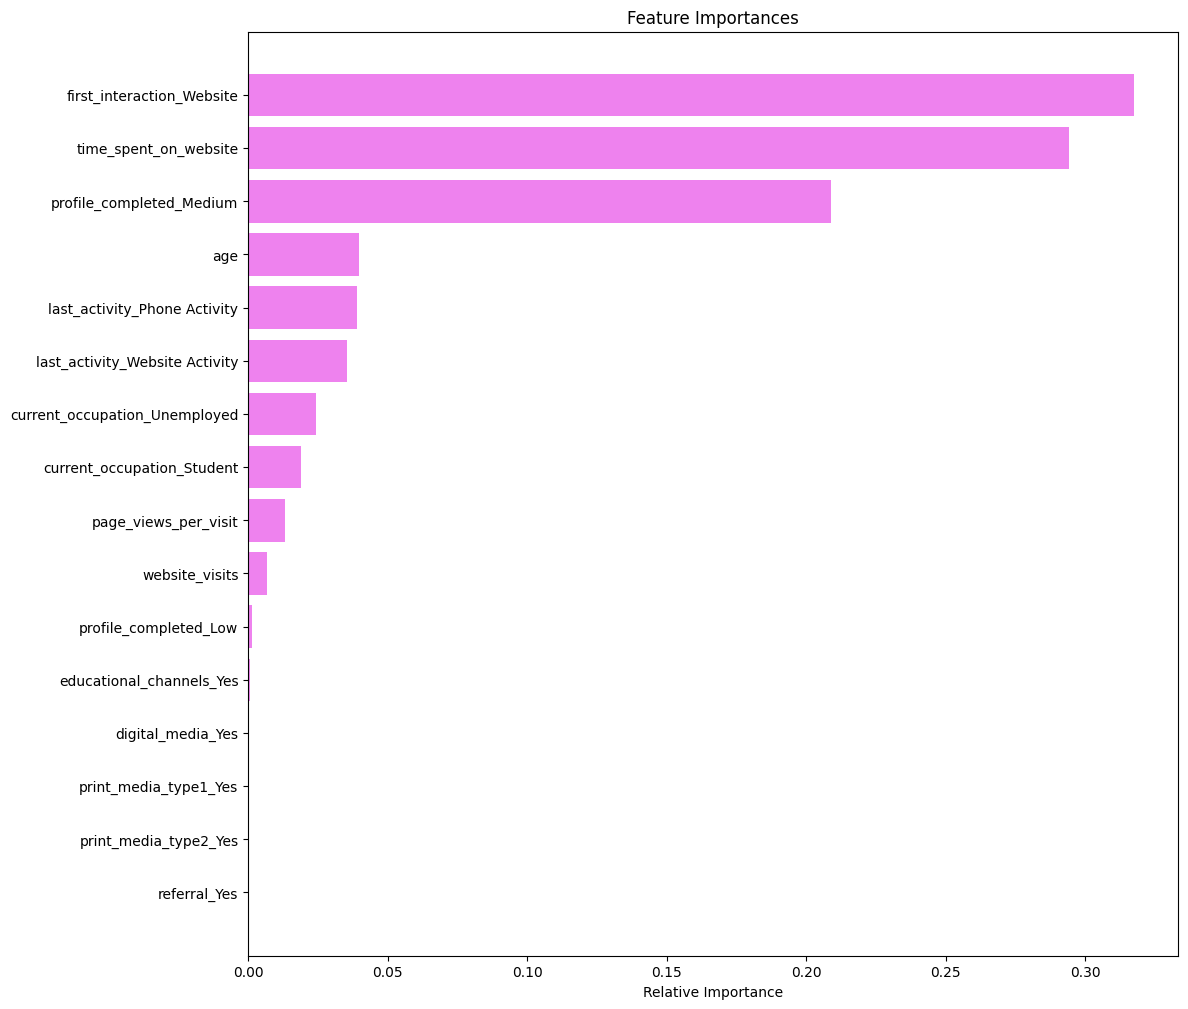

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X_train.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Conclusions:________**
- We should use the decision tree model since it outperformed the random forest model and gave more balanced metrics (and higher recall).
- We have been able to build a predictive model that can be used by the Edtech company to predict the leads who are likely to be converted with recall score of 0.89 helping formulate marketing policies accordingly.

### **Business Recommendations:_____**
- Most potential customers are in their mid to late 50s and early 60s. The company needs to target these customers more since they're more likely to be converted and age is a major factor in conversion.
- The company also needs to focus more on marketing via their educational channels since of all the media channels, this has the highest proportion of potential customers.
- The website outrach and activity needs to be prioritized since a lot of first timers contact the company via the web. However, ExtraaLearn also needs to ensure that their customer reps are available to answer emails from leads who have already come in contact with the company.
- A lead is likely to be converted if they are slightly older, a working professional, have made first contact with the company via the website, mostly completed their online profile and spend ample time on the company's webpage. Using our model, this is the typical (projected) profile of a lead who is likely to become a paid customer.